In [1]:
import yfinance as yf
# Get the data for tatasteel
ticker = "M&M.NS"

# Download the data
data = yf.download(ticker, start="2021-07-23", end="2024-07-23")

[*********************100%%**********************]  1 of 1 completed


In [2]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility

In [4]:
pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.9/932.9 kB 11.8 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from arch import arch_model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data['Returns'] = data['Adj Close'].pct_change()

In [8]:
returns = data['Returns'].dropna()

In [9]:
returns = returns[np.isfinite(returns)]

In [10]:
#Fit an ARCH model to the cleaned returns
model = arch_model(returns, vol='ARCH', p=1)
fitted_model = model.fit()

#Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 499442166.1090082
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1616.1534540788628
Iteration:      3,   Func. Count:     23,   Neg. LLF: -1942.7224278834462
Iteration:      4,   Func. Count:     28,   Neg. LLF: -1920.6079902121683
Iteration:      5,   Func. Count:     35,   Neg. LLF: -1944.400387967108
Iteration:      6,   Func. Count:     39,   Neg. LLF: -1944.4065151368418
Iteration:      7,   Func. Count:     43,   Neg. LLF: -1944.4065480055385
Iteration:      8,   Func. Count:     46,   Neg. LLF: -1944.4065480054264
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1944.4065480055385
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj.

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003026. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


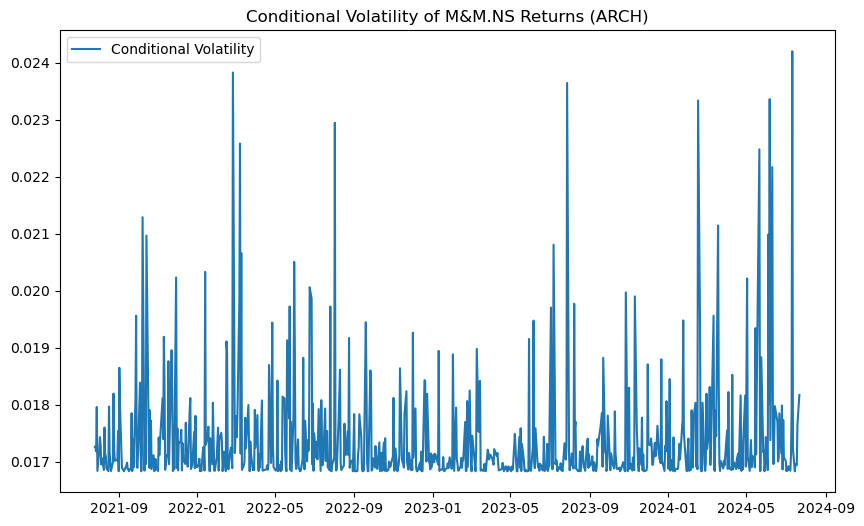

In [11]:
#Plot the fitted model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(fitted_model.conditional_volatility, label='Conditional Volatility')
plt.title(f'Conditional Volatility of {ticker} Returns (ARCH)')
plt.legend()
plt.show()

In [12]:
# Fit a GARCH model to the cleaned returns
# 'vol' parameter is set to 'GARCH' to specify a GARCH model
# 'p' parameter specifies the lag order of the autoregressive component
# 'q' parameter specifies the lag order of the moving average component
model = arch_model(returns, vol='Garch', p=1, q=1)
fitted_model = model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 24080162.088021625
Iteration:      2,   Func. Count:     18,   Neg. LLF: 269230.946606492
Iteration:      3,   Func. Count:     30,   Neg. LLF: 3100471.129387606
Iteration:      4,   Func. Count:     42,   Neg. LLF: 287374.0641946932
Iteration:      5,   Func. Count:     53,   Neg. LLF: 273589224.2024436
Iteration:      6,   Func. Count:     64,   Neg. LLF: 21559.40528512288
Iteration:      7,   Func. Count:     75,   Neg. LLF: 9686985.497950258
Iteration:      8,   Func. Count:     87,   Neg. LLF: 29675.793616995885
Iteration:      9,   Func. Count:     97,   Neg. LLF: 4708.1158330765265
Iteration:     10,   Func. Count:    107,   Neg. LLF: 1213.415338361674
Iteration:     11,   Func. Count:    117,   Neg. LLF: 30241.150657686
Iteration:     12,   Func. Count:    127,   Neg. LLF: 2880681.132525894
Iteration:     13,   Func. Count:    138,   Neg. LLF: -1948.376182156143
Optimization terminated successfully    (Exit mode 0)
         

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003026. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


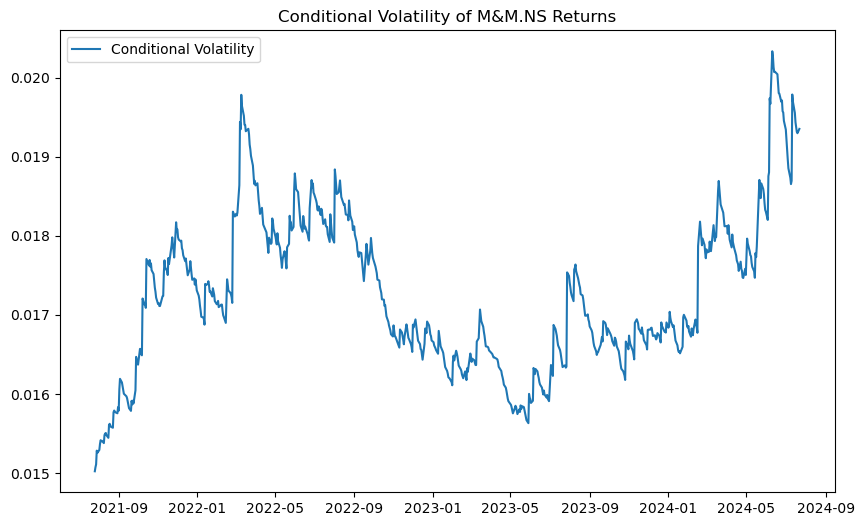

In [13]:
#Plot the fitted model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(fitted_model.conditional_volatility, label='Conditional Volatility')
plt.title(f'Conditional Volatility of {ticker} Returns')
plt.legend()
plt.show()

In [14]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     53,   Neg. LLF: 273589224.2024436
Iteration:     10,   Func. Count:    107,   Neg. LLF: 1213.415338361674
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1948.3761817538589
            Iterations: 17
            Function evaluations: 138
            Gradient evaluations: 13


/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003026. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [15]:
forecasts = res.forecast()

In [16]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [17]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-07-15,2722.850098,2739.000000,2708.100098,2731.050049,2731.050049,2017720,0.010022
2024-07-16,2754.949951,2766.850098,2740.000000,2756.750000,2756.750000,1925983,0.009410
2024-07-18,2756.000000,2825.949951,2736.500000,2819.449951,2819.449951,4122844,0.022744
2024-07-19,2819.949951,2819.949951,2743.000000,2749.300049,2749.300049,2042568,-0.024881
2024-07-22,2751.050049,2819.000000,2725.000000,2804.750000,2804.750000,2208103,0.020169


In [18]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-07-22  0.001811
                 h.1
Date                
2024-07-22  0.000373
                 h.1
Date                
2024-07-22  0.000373


In [19]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02     h.03      h.04      h.05      h.06  \
Date                                                                    
2024-07-22  0.000373  0.000371  0.00037  0.000369  0.000368  0.000366   

                h.07      h.08      h.09      h.10  ...     h.81      h.82  \
Date                                                ...                      
2024-07-22  0.000365  0.000364  0.000363  0.000362  ...  0.00032  0.000319   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-07-22  0.000319  0.000319  0.000319  0.000318  0.000318  0.000318   

                h.89      h.90  
Date                            
2024-07-22  0.000318  0.000317  

[1 rows x 90 columns]


In [20]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-22,0.000373,0.000371,0.00037,0.000369,0.000368,0.000366,0.000365,0.000364,0.000363,0.000362,...,0.00032,0.000319,0.000319,0.000319,0.000319,0.000318,0.000318,0.000318,0.000318,0.000317


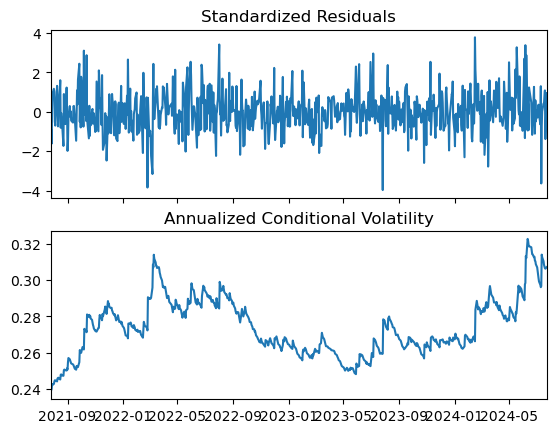

In [21]:
fig = res.plot(annualize="D")